In [1]:
from classification_model.processing.data_management import load_dataset
train = load_dataset(file_name='AWID-CLS-R-Trn.csv')
test = load_dataset(file_name='AWID-CLS-R-Tst.csv')

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (82,86,87,103,104,105,108,109,111,113,114,124,139,141,142,143,147) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (103,104,105,108,109,111,113,114,124,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (aw

In [2]:
from classification_model.processing.data_management import downsample
train_ds = downsample(train)
test_ds = downsample(test)

In [3]:
from classification_model.processing.data_management import get_target
X_train, y_train = get_target(train_ds)
X_test, y_test = get_target(test_ds)

In [4]:
from classification_model.pipeline import xgboost_pipe
xgboost_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cme1',
                 categ_missing_encoder(features=['wlan.wep.iv', 'wlan.wep.icv',
                                                 'wlan.ta', 'wlan.ra',
                                                 'wlan.ra', 'wlan.da'])),
                ('fc', feature_creation(features=[None])),
                ('oc',
                 outlier_capping(distribution='quantiles',
                                 features=['frame.interface_id', 'frame.dlt',
                                           'frame.offset_shift',
                                           'frame.time_delta',
                                           'frame.time_delta_displayed',
                                           'frame.tim...
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3, metric='mlogloss',
                   

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
y_train_pred = xgboost_pipe.predict(X_train)
print(classification_report(y_train, y_train_pred))

               precision    recall  f1-score   support

     flooding       1.00      1.00      1.00     48484
impersonation       1.00      1.00      1.00     48522
    injection       1.00      1.00      1.00     65379
       normal       1.00      1.00      1.00    162385

     accuracy                           1.00    324770
    macro avg       1.00      1.00      1.00    324770
 weighted avg       1.00      1.00      1.00    324770



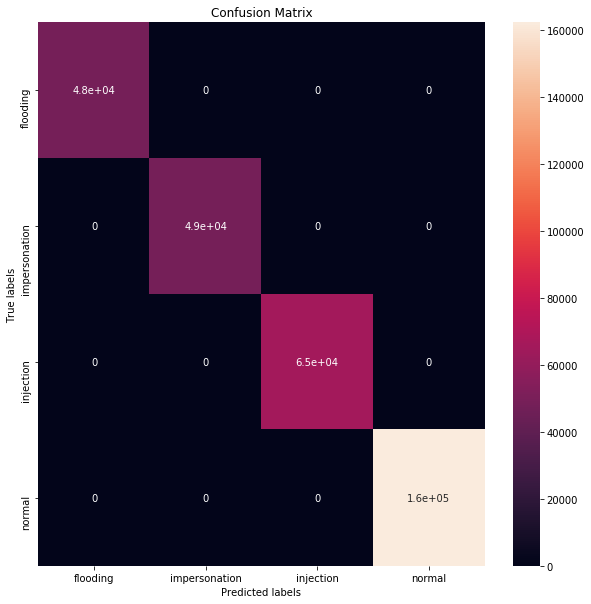

In [7]:
labels = ['flooding', 'impersonation', 'injection', 'normal']
cm = confusion_matrix(y_train, y_train_pred, labels)
plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [9]:
y_test_pred = xgboost_pipe.predict(X_test)
print(classification_report(y_test, y_test_pred))

               precision    recall  f1-score   support

     flooding       1.00      0.68      0.81      8097
impersonation       1.00      0.07      0.13     20079
    injection       0.46      1.00      0.63     16682
       normal       0.94      0.99      0.96     44858

     accuracy                           0.76     89716
    macro avg       0.85      0.68      0.63     89716
 weighted avg       0.87      0.76      0.70     89716



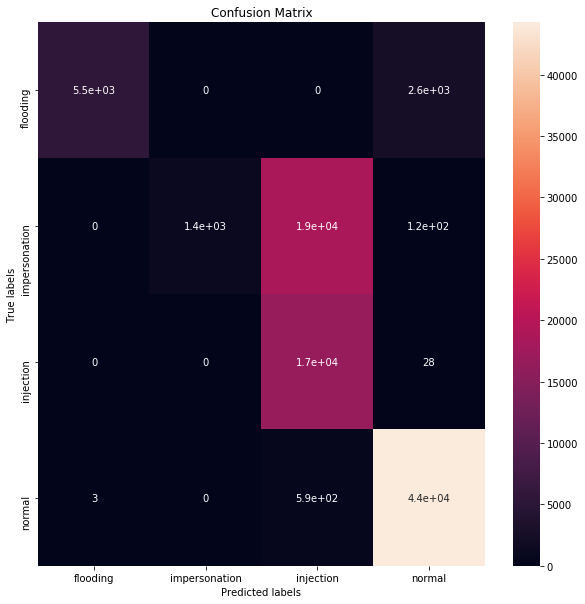

In [10]:
labels = ['flooding', 'impersonation', 'injection', 'normal']
cm = confusion_matrix(y_test, y_test_pred, labels)
plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [11]:
from sklearn.pipeline import Pipeline

data_pipe = Pipeline(xgboost_pipe.steps[:-2])
data_pipe.steps

[('cme1',
  categ_missing_encoder(features=['wlan.wep.iv', 'wlan.wep.icv', 'wlan.ta',
                                  'wlan.ra', 'wlan.ra', 'wlan.da'])),
 ('fc', feature_creation(features=[None])),
 ('oc',
  outlier_capping(distribution='quantiles',
                  features=['frame.interface_id', 'frame.dlt',
                            'frame.offset_shift', 'frame.time_delta',
                            'frame.time_delta_displayed', 'frame.time_relative',
                            'frame.len', 'frame.cap_len', 'frame.marked',
                            'frame.ignored', 'radiotap.version', 'radiotap.pad',
                            'radiotap.length', 'radiotap.present.tsft',
                            'radiotap.present.flags', 'radiotap.prese...
                            'radiotap.present.dbm_antnoise',
                            'radiotap.present.lock_quality',
                            'radiotap.present.tx_attenuation',
                            'radiotap.present.db_

In [12]:
X_train_trans = data_pipe.transform(X_train)

In [13]:
import pandas as pd
feature_importance = pd.DataFrame()
feature_importance['feature'] = X_train_trans.columns
feature_importance

,feature
0,frame.time_delta
1,frame.time_relative
2,frame.len
3,radiotap.flags.cfp
4,radiotap.datarate
...,...
31,wlan.qos.bit4
32,wlan.wep.iv_passed1second_count
33,wlan.ta_passed1second_count
34,wlan.wep.iv_passed1second_count_change


In [14]:
pd.set_option('display.max_rows', 500)
feature_importance['importance'] = xgboost_pipe.named_steps['xgb'].feature_importances_


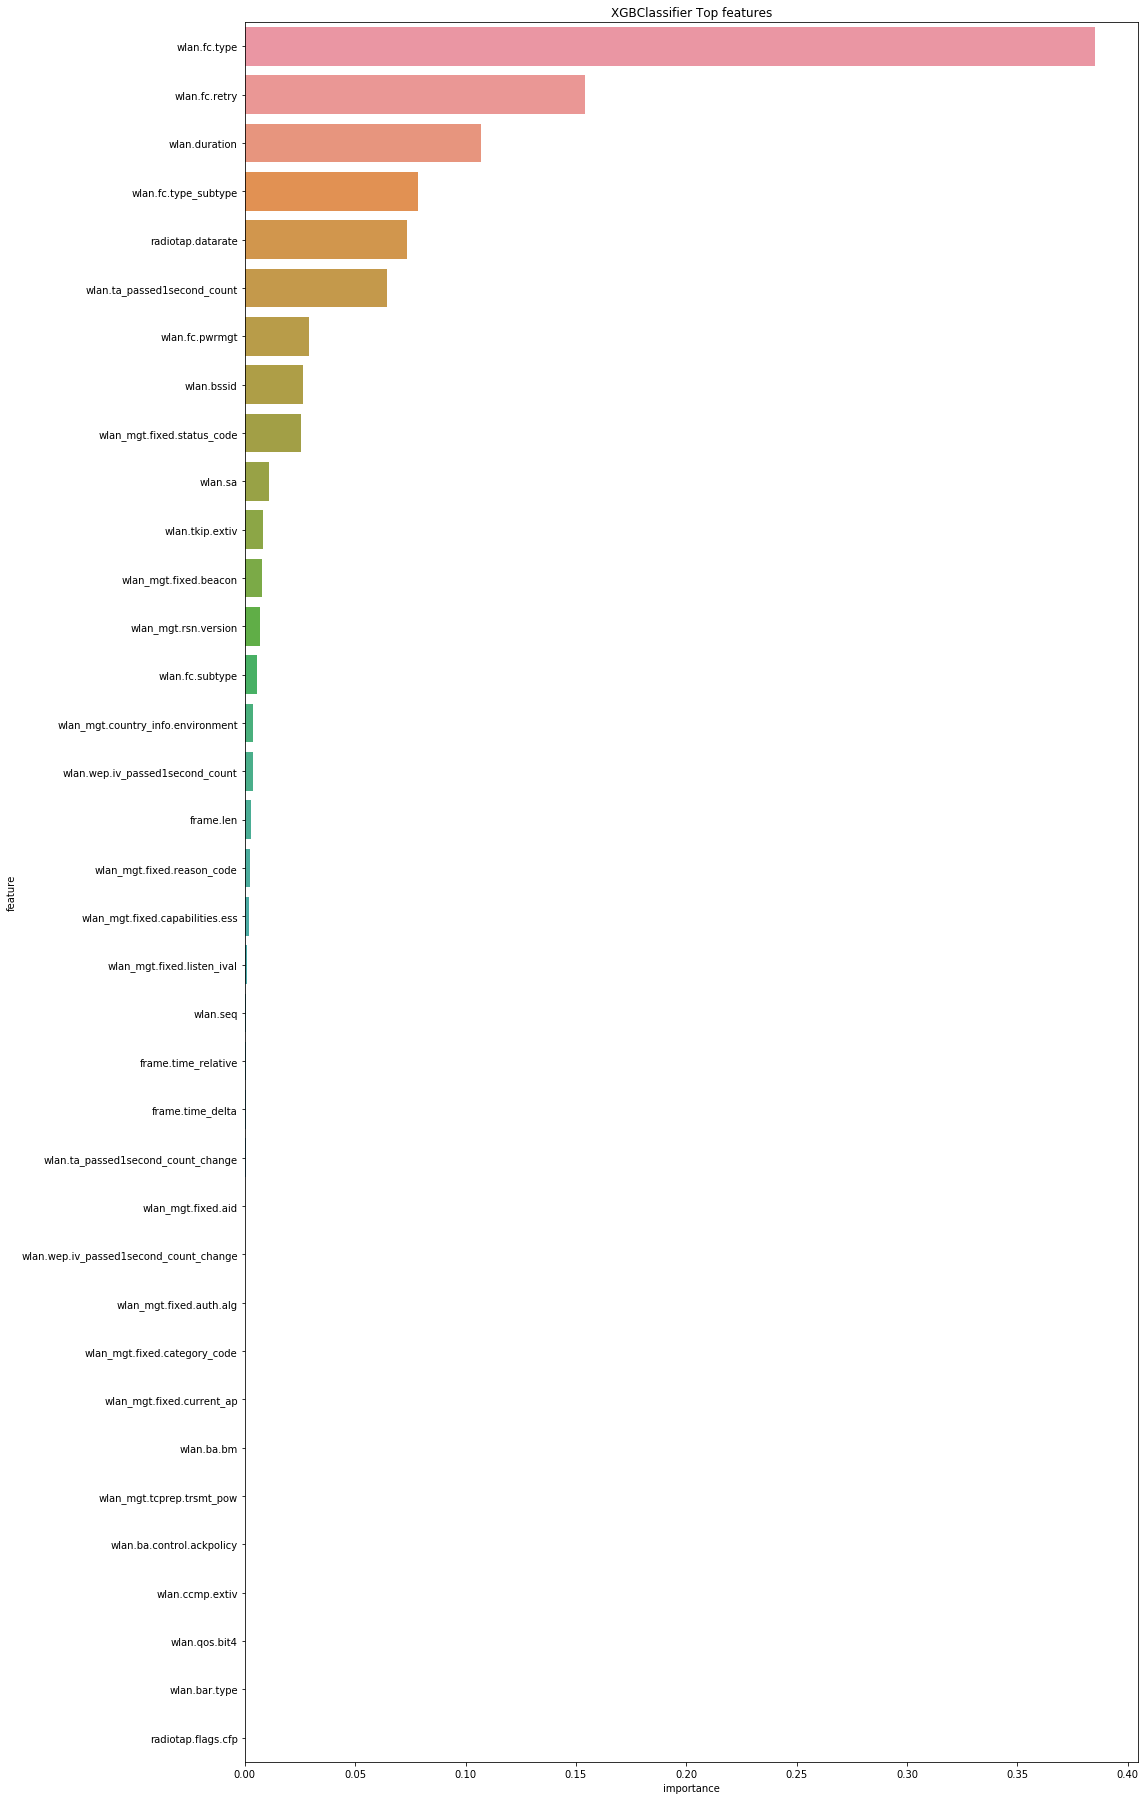

In [15]:
plt.figure(figsize=(16, 32))
sns.barplot(data=feature_importance.sort_values(by='importance', ascending=False), x='importance', y='feature');
plt.title('XGBClassifier Top features');

In [16]:
X_test_bad = X_test[y_test != y_test_pred]
y_test_bad = y_test[y_test != y_test_pred]
X_test_bad = data_pipe.transform(X_test_bad)
X_test_bad['class'] = y_test_bad
X_test_bad['frame.time_epoch'] = X_test['frame.time_epoch']

In [17]:
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd

In [18]:
from classification_model.processing.feat_eng_categ import one_hot_encoder
ohe = one_hot_encoder(features='class')
X_test_bad = ohe.fit_transform(X_test_bad)

In [19]:
def h(content):
    display(HTML(content))
    
def timehist(df, tcol, target, col, target_first, clipping=9999999999999999, concat_df = False, odf = None):
    if concat_df == True:
        df = pd.concat([df, odf])
        
    title = target + ' Hist ' + col
    if( target_first==True):
        df[df[target] == 1].set_index(tcol)[col].clip(0, clipping).plot(style='.', figsize=(15, 3))
        df[df[target] == 0].set_index(tcol)[col].clip(0, clipping).plot(style='.', figsize=(15, 3))
        plt.title(title)
        plt.show()
    elif( target_first==False):
        df[df[target] == 0].set_index(tcol)[col].clip(0, clipping).plot(style='.', title= title, figsize=(15, 3))
        df[df[target] == 1].set_index(tcol)[col].clip(0, clipping).plot(style='.', title= title, figsize=(15, 3))
        plt.title(title)
        plt.show()

In [20]:
def _desc(data, col, label):
    d0 = data.describe().reset_index()
    d0.columns = [col, label]
    return d0.append({col:'unique values', label:data.unique().shape[0]}, ignore_index=True) \
             .append({col:'NaNs', label:data.isnull().sum()}, ignore_index=True) \
             .append({col:'NaNs share', label:np.round(data.isnull().sum() / data.shape[0], 4)}, ignore_index=True) \

def desc(df_train, col, target, include_test=False, df_test=None):
    d0 = _desc(df_train[col], col, 'Train')
    d1 = _desc(df_train.loc[df_train[target] == 1, col], col, 'Train normal')
    d2 = _desc(df_train.loc[df_train[target] == 0, col], col, 'Train not normal')
    if( include_test):
        d3 = _desc(df_test[col], col, 'Test')
        d4 = _desc(df_test.loc[df_test[target] == 1, col], col, 'Test normal')
        d5 = _desc(df_test.loc[df_test[target] == 0, col], col, 'Test not normal')
    if( include_test):
        dd = d0.merge(d1).merge(d2).merge(d3).merge(d4).merge(d5)
    else:
        dd = d0.merge(d1).merge(d2)
    display(dd)
    
    h('<b>Most popular values (NaN = -999):</b>')
    N = 10
    d0 = df_train[[target,col]].groupby(col)[target].agg(['size','mean','sum']).reset_index().sort_values('size', ascending=False).reset_index(drop=True)
    d0 = d0.head(N)
    d0 = d0.rename({'size':'Count in train (desc)','mean':'Mean target train','sum':'Sum target train'}, axis=1)
    display(d0)
    
    if( include_test):
        d1 = df_test[[target,col]].groupby(col)[target].agg(['size','mean','sum']).reset_index().sort_values('size', ascending=False).reset_index(drop=True)
        d1 = d1.head(N)
        d1 = d1.rename({'size':'Count in test (desc)','mean':'Mean target test','sum':'Sum target test'}, axis=1)
        display(d1)

In [21]:
def hist1(df,col):
    plt.figure(figsize=(15, 3))
    plt.hist(df[col], bins=70);
    plt.title('Train histogram: ' + col);
    plt.show()

In [22]:
def corr1(df,col):
    N = None #10000
    num_vars = [f for f in df.columns if df[f].dtype != 'object']
    trx = df.head(N) if N is not None else df.copy()
    corrs = trx[num_vars].corrwith(trx[col]).reset_index().sort_values(0, ascending=False).reset_index(drop=True).rename({'index':'Column',0:'Correlation with ' + col}, axis=1)
    h('<b>Most correlated values with ' + col + ':</b>')
    trx = pd.concat([corrs.head(6), corrs.dropna().tail(5)])
    def linkx(val):
        return '<a href="#c_{}">{}</a>'.format(val, val)
    trx['Column'] = trx['Column'].apply(linkx)
    h(trx.to_html(escape=False))

In [23]:
def numeric(df_input, tcol_input, target_input, col_input, target_first_input, df_test, include_test):
    timehist(df=df_input, tcol=tcol_input, target=target_input, col=col_input, target_first=target_first_input, odf=df_test, concat_df=include_test)
    hist1(df_input,col_input)
    desc(df_input, col_input, target_input, include_test, df_test)
    corr1(df_input,col_input)

In [24]:
def categorical(df, col, target, df_test, include_test):
    desc(df, col, target, include_test, df_test)

In [25]:
def proc(df, tcol, target, col, target_first, df_test, include_test):
    if col not in ['isFraud','TransactionDT']:
        h('<h3 id="c_' + col + '">' + col + '</h3>' + '<a style="font-size:11px" href="#home">(Jump to top)</a>')
        categorical(df, col, target, df_test, include_test) if df[col].dtype == 'object' else numeric(df, tcol, target, col, target_first, df_test, include_test)

In [26]:
columns = list(X_test_bad.columns)
for x in ['frame.time_epoch', 'class_normal', 'class_injection', 'class_impersonation', 'class_flooding']:
    columns.remove(x)

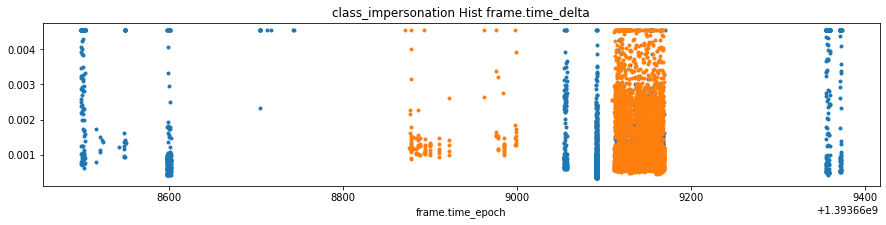

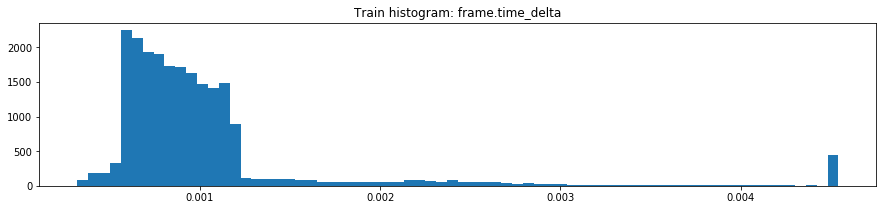

,frame.time_delta,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.000000
1,mean,0.001043,0.000986,0.001381
2,std,0.000703,0.000532,0.001266
3,min,0.000320,0.000447,0.000320
4,25%,0.000691,0.000700,0.000612
5,50%,0.000871,0.000871,0.000866
6,75%,0.001078,0.001066,0.001453
7,max,0.004543,0.004543,0.004543
8,unique values,2219.000000,1780.000000,1240.000000
9,NaNs,0.000000,0.000000,0.000000


,frame.time_delta,Count in train (desc),Mean target train,Sum target train
0,0.004543,438,0.198630,87
1,0.000750,88,0.954545,84
2,0.000771,83,0.963855,80
3,0.000650,78,0.974359,76
4,0.001031,76,0.960526,73
5,0.000931,74,0.972973,72
6,0.000612,71,0.985915,70
7,0.000871,68,0.970588,66
8,0.000893,67,1.000000,67
9,0.000969,65,0.923077,60


,Column,Correlation with frame.time_delta
0,frame.time_delta,1.000000
1,wlan.fc.pwrmgt,0.242991
2,frame.len,0.233599
3,wlan.sa,0.203234
4,wlan_mgt.fixed.reason_code,0.171201
5,class_normal,0.147385
25,class_impersonation,-0.198801
26,wlan.fc.type,-0.210322
27,frame.time_epoch,-0.220998
28,wlan.wep.iv_passed1second_count,-0.263104


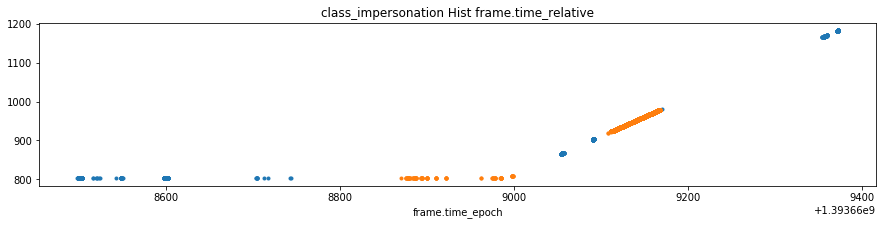

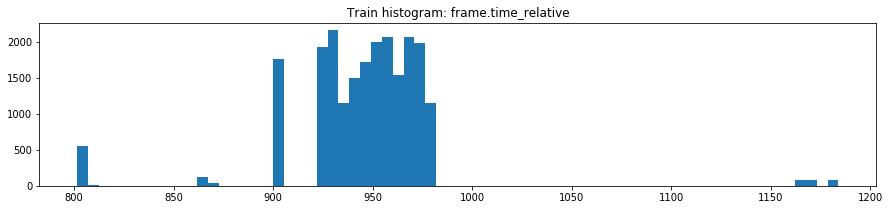

,frame.time_relative,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.000000
1,mean,945.628828,950.597493,916.576950
2,std,39.823889,20.241536,86.469316
3,min,801.676906,801.676906,801.676906
4,25%,930.635206,935.750503,901.862607
5,50%,949.240210,952.353236,902.542300
6,75%,965.317043,966.696493,926.965563
7,max,1183.890811,979.300550,1183.890811
8,unique values,21385.000000,18632.000000,2754.000000
9,NaNs,0.000000,0.000000,0.000000


,frame.time_relative,Count in train (desc),Mean target train,Sum target train
0,801.676906,547,0.177331,97
1,959.590880,1,1.000000,1
2,959.587570,1,1.000000,1
3,959.586445,1,1.000000,1
4,959.585221,1,1.000000,1
5,959.582663,1,1.000000,1
6,959.581683,1,1.000000,1
7,959.580770,1,1.000000,1
8,959.576680,1,1.000000,1
9,959.575258,1,1.000000,1


,Column,Correlation with frame.time_relative
0,frame.time_relative,1.000000
1,frame.time_epoch,0.811162
2,wlan.duration,0.553104
3,wlan.bssid,0.546322
4,wlan.seq,0.519924
5,wlan.fc.type,0.504629
25,class_injection,-0.129244
26,wlan_mgt.fixed.capabilities.ess,-0.255004
27,wlan_mgt.fixed.beacon,-0.255678
28,class_flooding,-0.326861


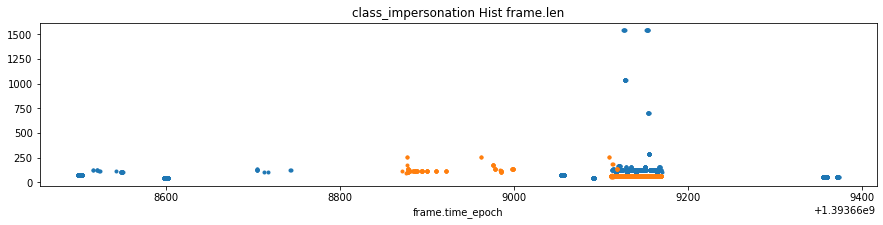

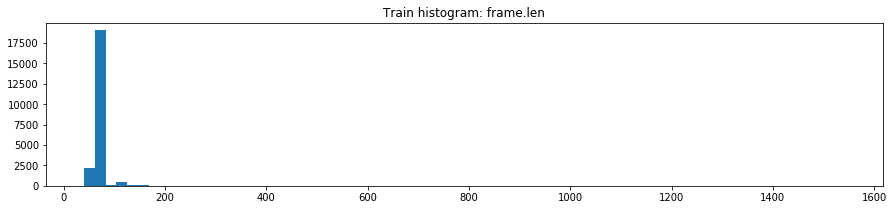

,frame.len,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.000000
1,mean,67.405271,66.403460,73.262879
2,std,46.766405,5.763626,121.427377
3,min,40.000000,60.000000,40.000000
4,25%,66.000000,66.000000,40.000000
5,50%,66.000000,66.000000,40.000000
6,75%,66.000000,66.000000,75.000000
7,max,1542.000000,258.000000,1542.000000
8,unique values,42.000000,15.000000,27.000000
9,NaNs,0.000000,0.000000,0.000000


,frame.len,Count in train (desc),Mean target train,Sum target train
0,66.0,18606,1,18606
1,40.0,1759,0,0
2,124.0,429,0,0
3,75.0,369,0,0
4,48.0,199,0,0
5,54.0,165,0,0
6,56.0,84,0,0
7,115.0,56,1,56
8,98.0,34,0,0
9,132.0,31,1,31


,Column,Correlation with frame.len
0,frame.len,1.000000
1,class_normal,0.418222
2,frame.time_delta,0.233599
3,wlan.seq,0.171257
4,wlan.sa,0.164185
5,wlan.bssid,0.160795
25,wlan.wep.iv_passed1second_count,-0.089605
26,wlan.ta_passed1second_count,-0.109525
27,wlan.fc.type_subtype,-0.123058
28,class_flooding,-0.157304


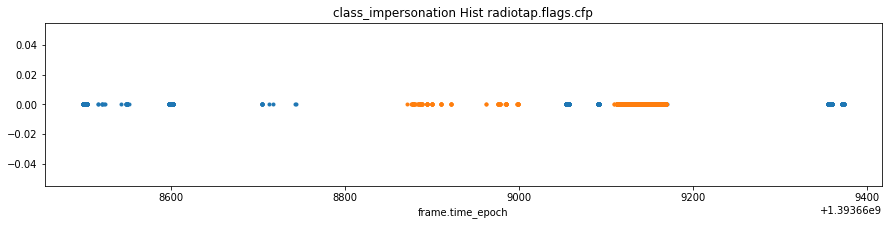

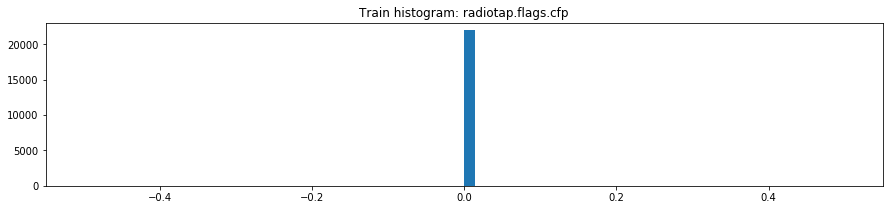

,radiotap.flags.cfp,Train,Train normal,Train not normal
0,count,21931.0,18728.0,3203.0
1,mean,0.0,0.0,0.0
2,std,0.0,0.0,0.0
3,min,0.0,0.0,0.0
4,25%,0.0,0.0,0.0
5,50%,0.0,0.0,0.0
6,75%,0.0,0.0,0.0
7,max,0.0,0.0,0.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,radiotap.flags.cfp,Count in train (desc),Mean target train,Sum target train
0,0.0,21931,0.853951,18728


,Column,Correlation with radiotap.flags.cfp
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,radiotap.datarate,NaN
5,wlan.fc.type_subtype,NaN


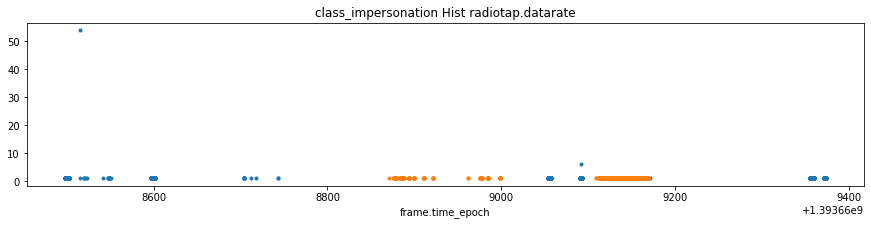

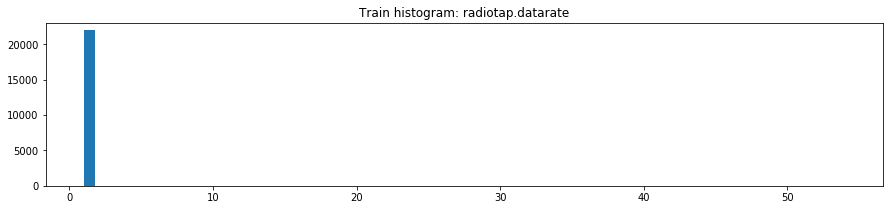

,radiotap.datarate,Train,Train normal,Train not normal
0,count,21931.000000,18728.0,3203.000000
1,mean,1.002645,1.0,1.018108
2,std,0.359475,0.0,0.940608
3,min,1.000000,1.0,1.000000
4,25%,1.000000,1.0,1.000000
5,50%,1.000000,1.0,1.000000
6,75%,1.000000,1.0,1.000000
7,max,54.000000,1.0,54.000000
8,unique values,3.000000,1.0,3.000000
9,NaNs,0.000000,0.0,0.000000


,radiotap.datarate,Count in train (desc),Mean target train,Sum target train
0,1.0,21929,0.854029,18728
1,6.0,1,0.000000,0
2,54.0,1,0.000000,0


,Column,Correlation with radiotap.datarate
0,radiotap.datarate,1.000000
1,wlan.qos.bit4,0.995579
2,class_injection,0.188009
3,wlan.seq,0.024112
4,wlan.fc.subtype,0.015048
5,frame.len,0.007764
25,class_impersonation,-0.017790
26,wlan.wep.iv_passed1second_count,-0.018686
27,wlan.ta_passed1second_count,-0.022911
28,frame.time_relative,-0.024984


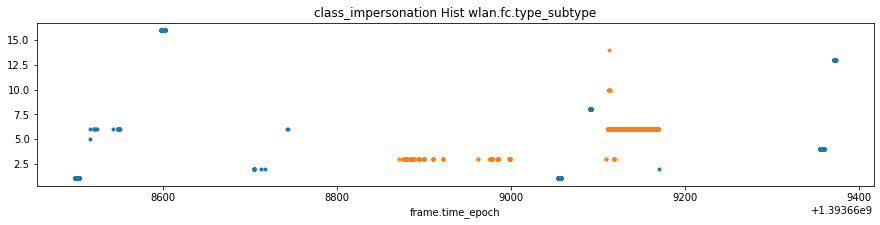

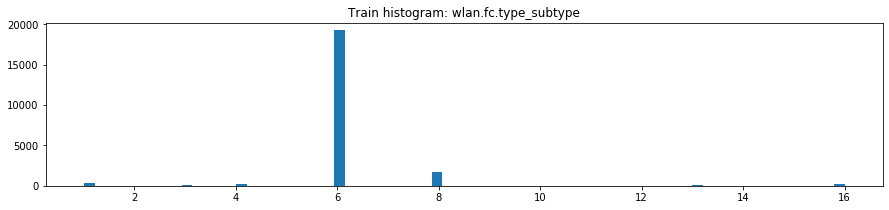

,wlan.fc.type_subtype,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.000000
1,mean,6.162327,5.982913,7.211364
2,std,1.379085,0.251288,3.371534
3,min,1.000000,3.000000,1.000000
4,25%,6.000000,6.000000,6.000000
5,50%,6.000000,6.000000,8.000000
6,75%,6.000000,6.000000,8.000000
7,max,16.000000,14.000000,16.000000
8,unique values,11.000000,4.000000,8.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.fc.type_subtype,Count in train (desc),Mean target train,Sum target train
0,6,19222,0.967953,18606
1,8,1759,0.000000,0
2,1,369,0.000000,0
3,16,199,0.000000,0
4,4,165,0.000000,0
5,3,116,1.000000,116
6,13,84,0.000000,0
7,2,10,0.000000,0
8,10,5,1.000000,5
9,5,1,0.000000,0


,Column,Correlation with wlan.fc.type_subtype
0,wlan.fc.type_subtype,1.000000
1,wlan.fc.subtype,0.523467
2,class_flooding,0.356313
3,wlan_mgt.fixed.reason_code,0.307448
4,wlan.ta_passed1second_count,0.083248
5,wlan.wep.iv_passed1second_count,0.082600
25,class_impersonation,-0.314588
26,wlan.duration,-0.347217
27,wlan.bssid,-0.386020
28,wlan.seq,-0.474182


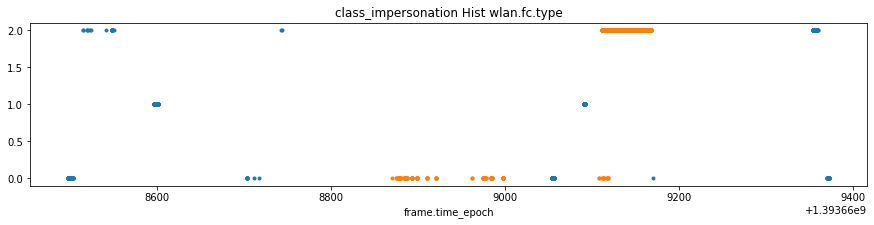

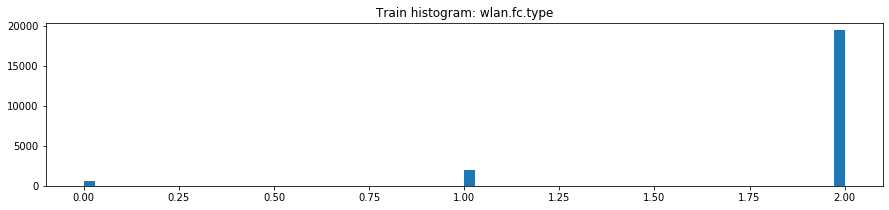

,wlan.fc.type,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.000000
1,mean,1.857371,1.986971,1.099594
2,std,0.419098,0.160900,0.615546
3,min,0.000000,0.000000,0.000000
4,25%,2.000000,2.000000,1.000000
5,50%,2.000000,2.000000,1.000000
6,75%,2.000000,2.000000,1.000000
7,max,2.000000,2.000000,2.000000
8,unique values,3.000000,2.000000,3.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.fc.type,Count in train (desc),Mean target train,Sum target train
0,2.0,19388,0.959666,18606
1,1.0,1958,0.000000,0
2,0.0,585,0.208547,122


,Column,Correlation with wlan.fc.type
0,wlan.fc.type,1.000000
1,wlan.duration,0.839664
2,wlan.bssid,0.802766
3,class_impersonation,0.747770
4,wlan.seq,0.671106
5,frame.time_epoch,0.553082
25,wlan_mgt.fixed.reason_code,-0.274813
26,wlan_mgt.fixed.beacon,-0.336899
27,wlan_mgt.fixed.capabilities.ess,-0.338241
28,wlan.fc.subtype,-0.798027


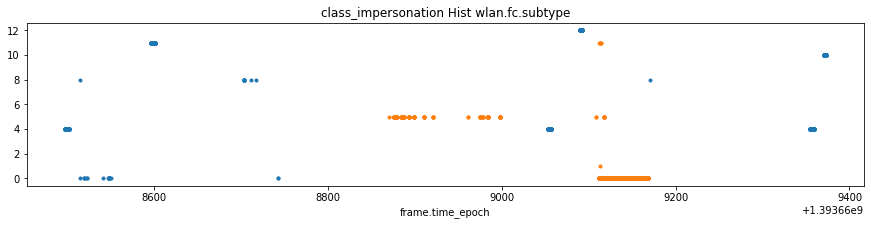

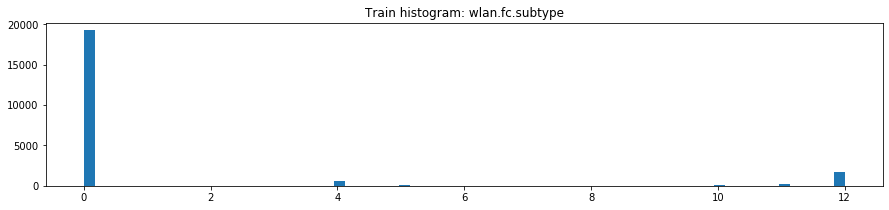

,wlan.fc.subtype,Train,Train normal,Train not normal
0,count,21931.000000,18728.00000,3203.000000
1,mean,1.230997,0.03396,8.230097
2,std,3.478130,0.43135,4.937758
3,min,0.000000,0.00000,0.000000
4,25%,0.000000,0.00000,4.000000
5,50%,0.000000,0.00000,12.000000
6,75%,0.000000,0.00000,12.000000
7,max,12.000000,11.00000,12.000000
8,unique values,8.000000,4.00000,6.000000
9,NaNs,0.000000,0.00000,0.000000


,wlan.fc.subtype,Count in train (desc),Mean target train,Sum target train
0,0.0,19222,0.967953,18606
1,12.0,1759,0.000000,0
2,4.0,534,0.000000,0
3,11.0,204,0.024510,5
4,5.0,116,1.000000,116
5,10.0,84,0.000000,0
6,8.0,11,0.000000,0
7,1.0,1,1.000000,1


,Column,Correlation with wlan.fc.subtype
0,wlan.fc.subtype,1.000000
1,class_flooding,0.941504
2,wlan.fc.type_subtype,0.523467
3,wlan_mgt.fixed.reason_code,0.156336
4,wlan_mgt.fixed.beacon,0.087579
5,wlan_mgt.fixed.capabilities.ess,0.087196
25,class_impersonation,-0.832222
26,wlan.sa,-0.893876
27,wlan.seq,-0.895825
28,wlan.duration,-0.933351


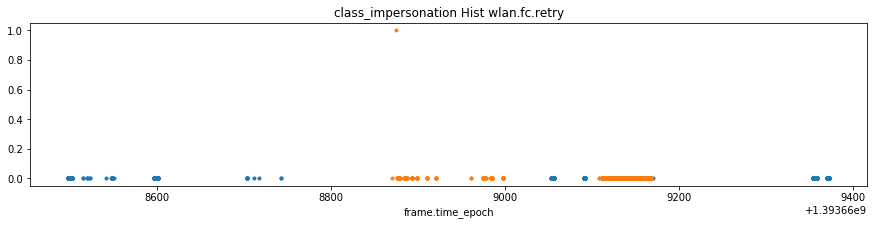

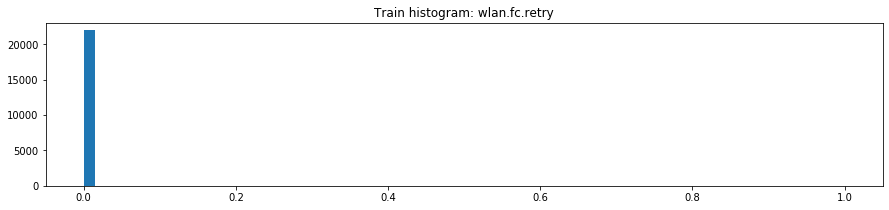

,wlan.fc.retry,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.0
1,mean,0.000046,0.000053,0.0
2,std,0.006753,0.007307,0.0
3,min,0.000000,0.000000,0.0
4,25%,0.000000,0.000000,0.0
5,50%,0.000000,0.000000,0.0
6,75%,0.000000,0.000000,0.0
7,max,1.000000,1.000000,0.0
8,unique values,2.000000,2.000000,1.0
9,NaNs,0.000000,0.000000,0.0


,wlan.fc.retry,Count in train (desc),Mean target train,Sum target train
0,0.0,21930,0.853944,18727
1,1.0,1,1.000000,1


,Column,Correlation with wlan.fc.retry
0,wlan.fc.retry,1.000000
1,wlan_mgt.fixed.beacon,0.088833
2,wlan_mgt.fixed.capabilities.ess,0.088480
3,wlan.seq,0.017074
4,wlan.fc.subtype,0.007318
5,frame.len,0.004562
25,frame.time_epoch,-0.018617
26,wlan.wep.iv_passed1second_count,-0.019289
27,wlan.ta_passed1second_count,-0.023475
28,frame.time_relative,-0.024410


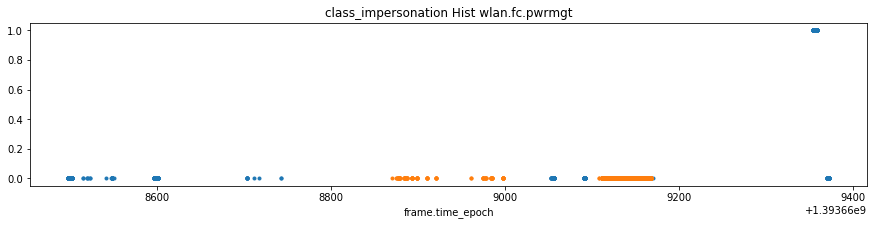

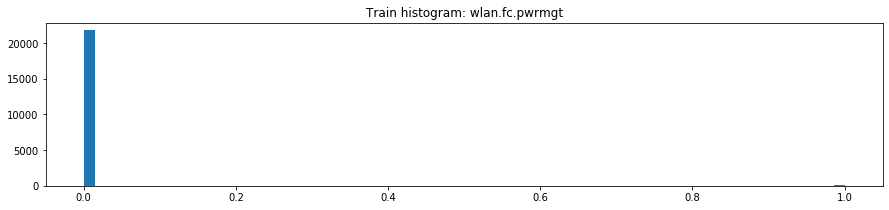

,wlan.fc.pwrmgt,Train,Train normal,Train not normal
0,count,21931.000000,18728.0,3203.000000
1,mean,0.007524,0.0,0.051514
2,std,0.086414,0.0,0.221079
3,min,0.000000,0.0,0.000000
4,25%,0.000000,0.0,0.000000
5,50%,0.000000,0.0,0.000000
6,75%,0.000000,0.0,0.000000
7,max,1.000000,0.0,1.000000
8,unique values,2.000000,1.0,2.000000
9,NaNs,0.000000,0.0,0.000000


,wlan.fc.pwrmgt,Count in train (desc),Mean target train,Sum target train
0,0.0,21766,0.860425,18728
1,1.0,165,0.000000,0


,Column,Correlation with wlan.fc.pwrmgt
0,wlan.fc.pwrmgt,1.000000
1,frame.time_relative,0.485536
2,frame.time_delta,0.242991
3,class_flooding,0.238291
4,frame.time_epoch,0.222096
5,wlan.seq,0.129095
25,wlan.wep.iv_passed1second_count_change,-0.034270
26,wlan.fc.type_subtype,-0.136519
27,class_impersonation,-0.210533
28,wlan.wep.iv_passed1second_count,-0.220875


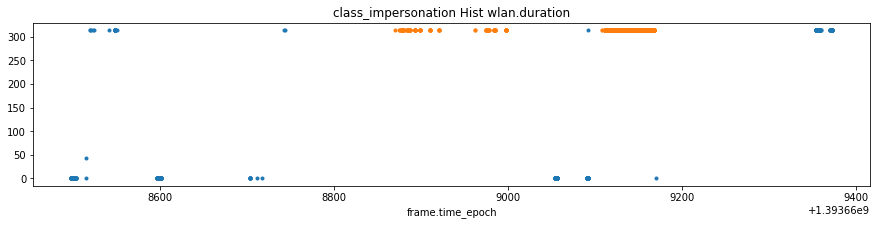

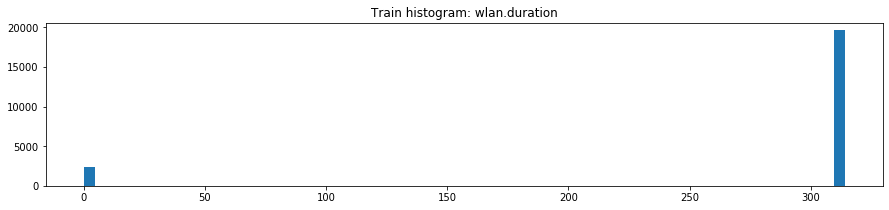

,wlan.duration,Train,Train normal,Train not normal
0,count,21931.000000,18728.0,3203.000000
1,mean,280.527381,314.0,84.812363
2,std,96.901355,0.0,139.428496
3,min,0.000000,314.0,0.000000
4,25%,314.000000,314.0,0.000000
5,50%,314.000000,314.0,0.000000
6,75%,314.000000,314.0,314.000000
7,max,314.000000,314.0,314.000000
8,unique values,3.000000,1.0,3.000000
9,NaNs,0.000000,0.0,0.000000


,wlan.duration,Count in train (desc),Mean target train,Sum target train
0,314.0,19593,0.955852,18728
1,0.0,2337,0.000000,0
2,44.0,1,0.000000,0


,Column,Correlation with wlan.duration
0,wlan.duration,1.000000
1,wlan.bssid,0.993521
2,wlan.seq,0.942632
3,wlan.fc.type,0.839664
4,class_impersonation,0.835289
5,wlan.sa,0.757964
25,frame.time_delta,-0.042097
26,wlan.ta_passed1second_count_change,-0.061478
27,wlan.fc.type_subtype,-0.347217
28,wlan.fc.subtype,-0.933351


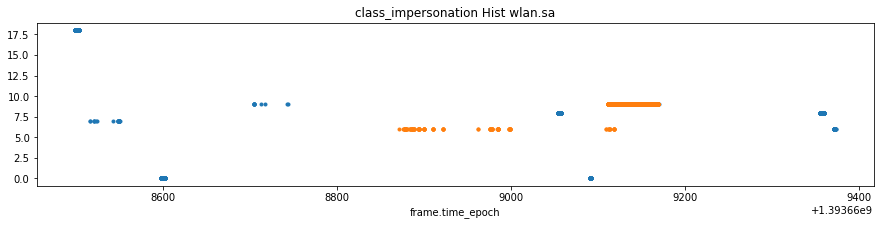

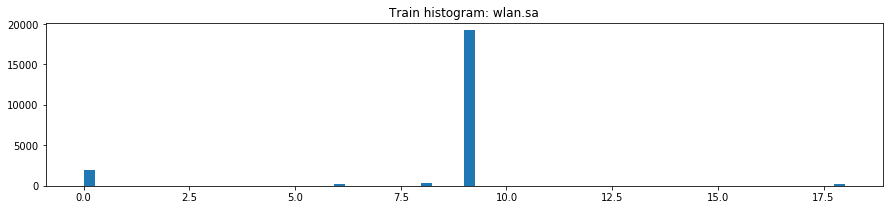

,wlan.sa,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.000000
1,mean,8.238065,8.980457,3.897284
2,std,2.745689,0.241350,5.405517
3,min,0.000000,6.000000,0.000000
4,25%,9.000000,9.000000,0.000000
5,50%,9.000000,9.000000,0.000000
6,75%,9.000000,9.000000,9.000000
7,max,18.000000,9.000000,18.000000
8,unique values,6.000000,2.000000,6.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.sa,Count in train (desc),Mean target train,Sum target train
0,9,19205,0.968810,18606
1,0,1958,0.000000,0
2,8,322,0.000000,0
3,18,212,0.000000,0
4,6,206,0.592233,122
5,7,28,0.000000,0


,Column,Correlation with wlan.sa
0,wlan.sa,1.000000
1,wlan.seq,0.810730
2,wlan.bssid,0.794993
3,wlan.duration,0.757964
4,class_impersonation,0.653822
5,wlan.fc.type,0.514072
25,wlan.ta_passed1second_count,-0.139397
26,wlan.wep.iv_passed1second_count,-0.146086
27,wlan.fc.type_subtype,-0.675426
28,class_flooding,-0.737767


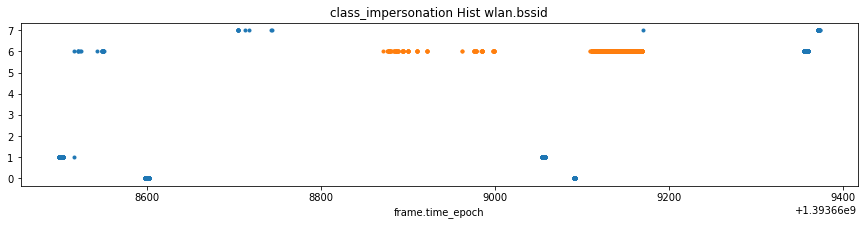

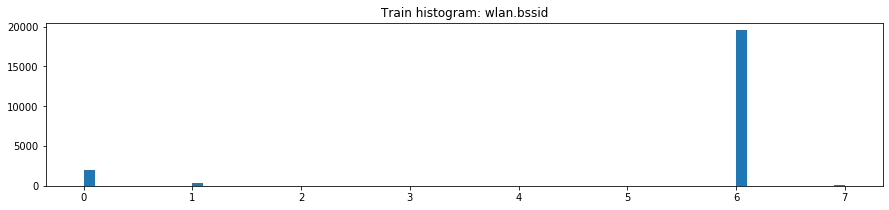

,wlan.bssid,Train,Train normal,Train not normal
0,count,21931.000000,18728.0,3203.000000
1,mean,5.384342,6.0,1.784577
2,std,1.805921,0.0,2.675295
3,min,0.000000,6.0,0.000000
4,25%,6.000000,6.0,0.000000
5,50%,6.000000,6.0,0.000000
6,75%,6.000000,6.0,6.000000
7,max,7.000000,6.0,7.000000
8,unique values,4.000000,1.0,4.000000
9,NaNs,0.000000,0.0,0.000000


,wlan.bssid,Count in train (desc),Mean target train,Sum target train
0,6,19507,0.960066,18728
1,0,1958,0.000000,0
2,1,370,0.000000,0
3,7,96,0.000000,0


,Column,Correlation with wlan.bssid
0,wlan.bssid,1.000000
1,wlan.duration,0.993521
2,wlan.seq,0.954096
3,class_impersonation,0.824362
4,wlan.fc.type,0.802766
5,wlan.sa,0.794993
25,frame.time_delta,-0.004919
26,wlan.ta_passed1second_count_change,-0.064969
27,wlan.fc.type_subtype,-0.386020
28,class_flooding,-0.933054


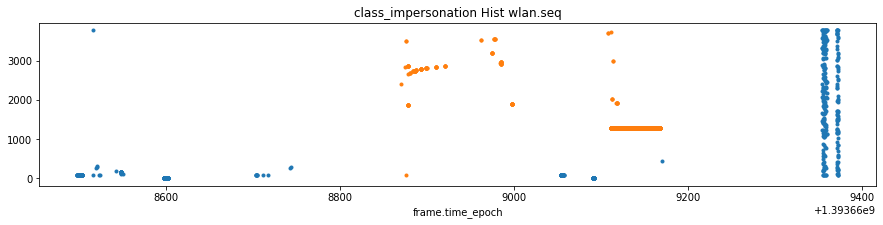

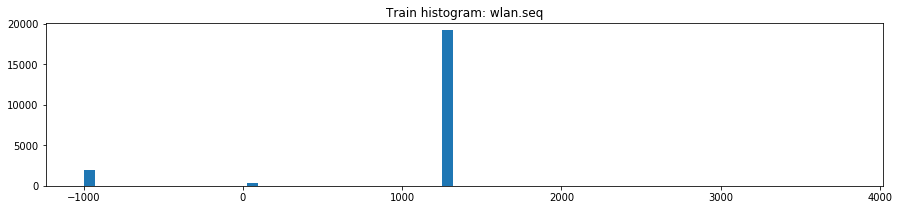

,wlan.seq,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.000000
1,mean,1082.462542,1302.112345,-201.833906
2,std,697.105872,121.115368,1144.697943
3,min,-999.000000,92.000000,-999.000000
4,25%,1293.000000,1293.000000,-999.000000
5,50%,1293.000000,1293.000000,-999.000000
6,75%,1293.000000,1293.000000,568.000000
7,max,3779.000000,3732.000000,3779.000000
8,unique values,309.000000,64.000000,250.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.seq,Count in train (desc),Mean target train,Sum target train
0,1293.0,19193,0.969416,18606
1,-999.0,1958,0.000000,0
2,92.0,392,0.002551,1
3,3779.0,16,0.000000,0
4,2843.0,3,1.000000,3
5,1907.0,3,1.000000,3
6,2729.0,3,1.000000,3
7,2750.0,3,1.000000,3
8,2844.0,3,1.000000,3
9,2752.0,3,1.000000,3


,Column,Correlation with wlan.seq
0,wlan.seq,1.000000
1,wlan.bssid,0.954096
2,wlan.duration,0.942632
3,wlan.sa,0.810730
4,class_impersonation,0.761920
5,wlan.fc.type,0.671106
25,wlan.ta_passed1second_count_change,-0.072205
26,wlan.wep.iv_passed1second_count,-0.091215
27,wlan.fc.type_subtype,-0.474182
28,class_flooding,-0.854470


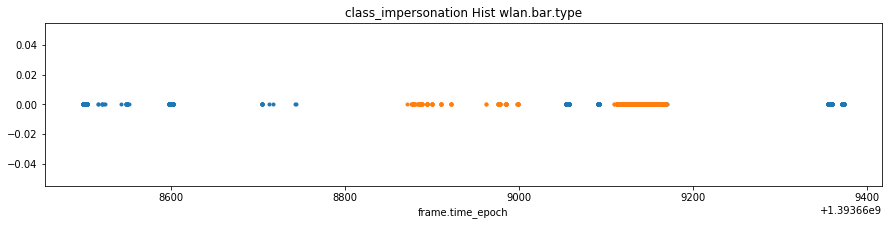

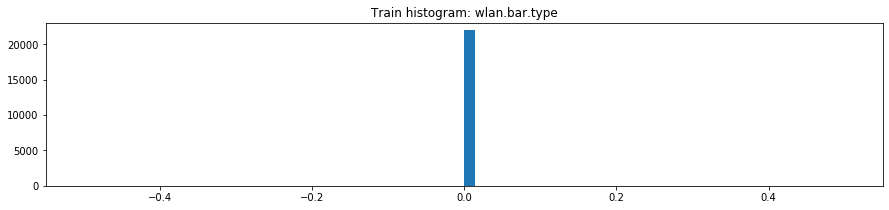

,wlan.bar.type,Train,Train normal,Train not normal
0,count,21931.0,18728.0,3203.0
1,mean,0.0,0.0,0.0
2,std,0.0,0.0,0.0
3,min,0.0,0.0,0.0
4,25%,0.0,0.0,0.0
5,50%,0.0,0.0,0.0
6,75%,0.0,0.0,0.0
7,max,0.0,0.0,0.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan.bar.type,Count in train (desc),Mean target train,Sum target train
0,0,21931,0.853951,18728


,Column,Correlation with wlan.bar.type
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,radiotap.datarate,NaN
5,wlan.fc.type_subtype,NaN


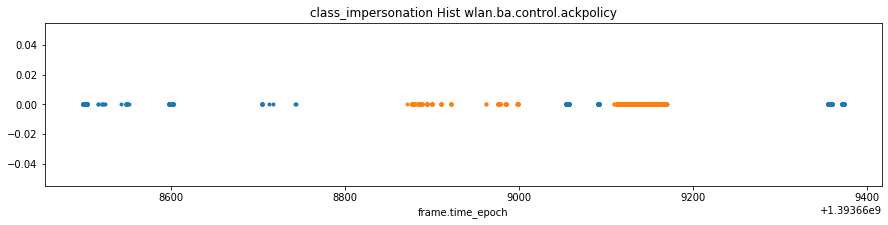

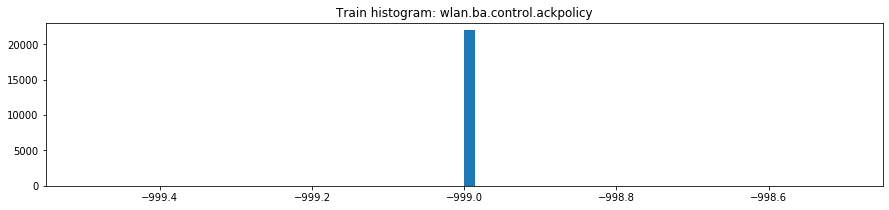

,wlan.ba.control.ackpolicy,Train,Train normal,Train not normal
0,count,21931.0,18728.0,3203.0
1,mean,-999.0,-999.0,-999.0
2,std,0.0,0.0,0.0
3,min,-999.0,-999.0,-999.0
4,25%,-999.0,-999.0,-999.0
5,50%,-999.0,-999.0,-999.0
6,75%,-999.0,-999.0,-999.0
7,max,-999.0,-999.0,-999.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan.ba.control.ackpolicy,Count in train (desc),Mean target train,Sum target train
0,-999.0,21931,0.853951,18728


,Column,Correlation with wlan.ba.control.ackpolicy
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,radiotap.datarate,NaN
5,wlan.fc.type_subtype,NaN


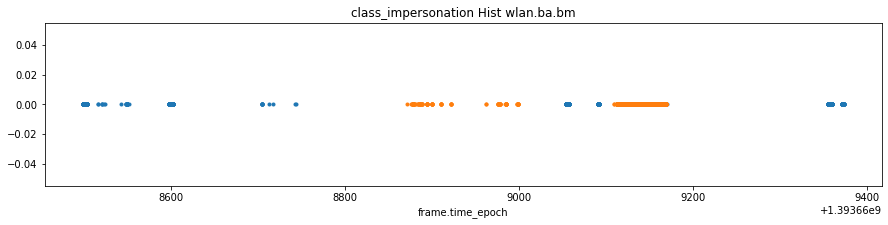

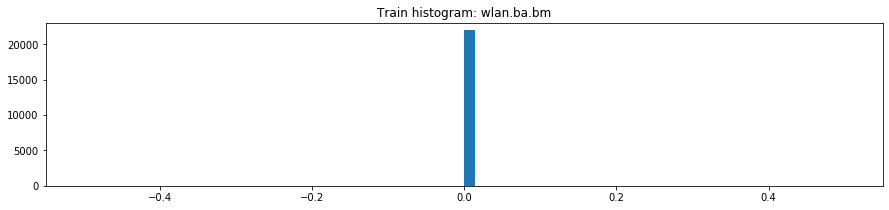

,wlan.ba.bm,Train,Train normal,Train not normal
0,count,21931.0,18728.0,3203.0
1,mean,0.0,0.0,0.0
2,std,0.0,0.0,0.0
3,min,0.0,0.0,0.0
4,25%,0.0,0.0,0.0
5,50%,0.0,0.0,0.0
6,75%,0.0,0.0,0.0
7,max,0.0,0.0,0.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan.ba.bm,Count in train (desc),Mean target train,Sum target train
0,0,21931,0.853951,18728


,Column,Correlation with wlan.ba.bm
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,radiotap.datarate,NaN
5,wlan.fc.type_subtype,NaN


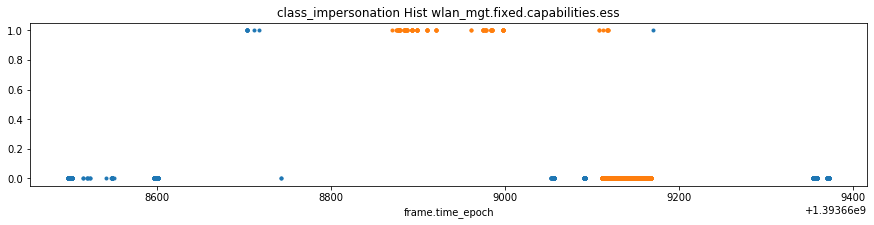

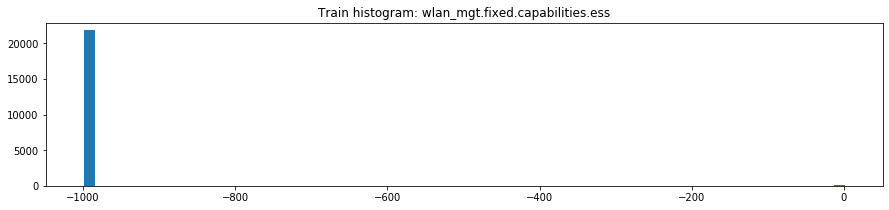

,wlan_mgt.fixed.capabilities.ess,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.000000
1,mean,-993.209110,-992.752670,-995.877927
2,std,75.878968,78.794877,55.796933
3,min,-999.000000,-999.000000,-999.000000
4,25%,-999.000000,-999.000000,-999.000000
5,50%,-999.000000,-999.000000,-999.000000
6,75%,-999.000000,-999.000000,-999.000000
7,max,1.000000,1.000000,1.000000
8,unique values,2.000000,2.000000,2.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan_mgt.fixed.capabilities.ess,Count in train (desc),Mean target train,Sum target train
0,-999.0,21804,0.853559,18611
1,1.0,127,0.921260,117


,Column,Correlation with wlan_mgt.fixed.capabilities.ess
0,wlan_mgt.fixed.capabilities.ess,1.000000
1,wlan_mgt.fixed.beacon,0.996032
2,wlan.seq,0.153830
3,frame.len,0.099004
4,wlan_mgt.fixed.aid,0.088480
5,wlan.fc.retry,0.088480
25,wlan.fc.type_subtype,-0.174573
26,wlan.wep.iv_passed1second_count,-0.205529
27,wlan.ta_passed1second_count,-0.253515
28,frame.time_relative,-0.255004


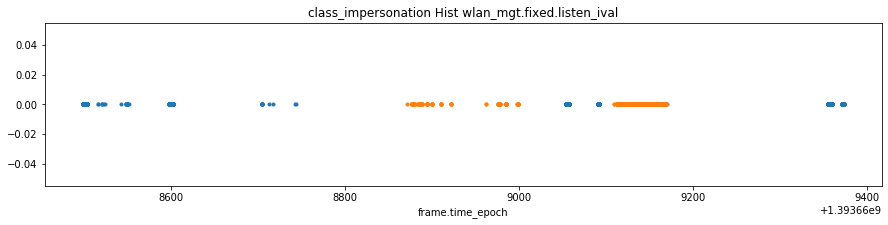

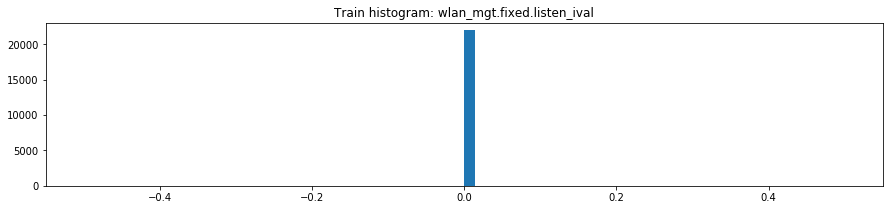

,wlan_mgt.fixed.listen_ival,Train,Train normal,Train not normal
0,count,21931.0,18728.0,3203.0
1,mean,0.0,0.0,0.0
2,std,0.0,0.0,0.0
3,min,0.0,0.0,0.0
4,25%,0.0,0.0,0.0
5,50%,0.0,0.0,0.0
6,75%,0.0,0.0,0.0
7,max,0.0,0.0,0.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan_mgt.fixed.listen_ival,Count in train (desc),Mean target train,Sum target train
0,0,21931,0.853951,18728


,Column,Correlation with wlan_mgt.fixed.listen_ival
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,radiotap.datarate,NaN
5,wlan.fc.type_subtype,NaN


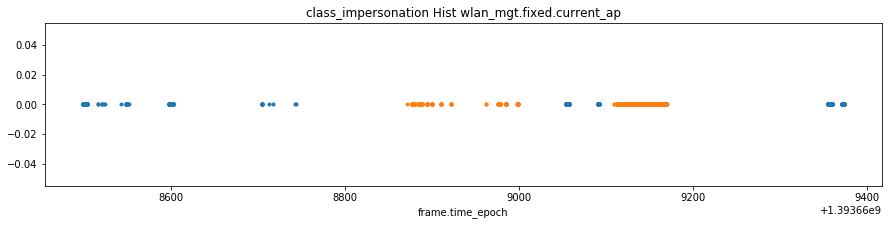

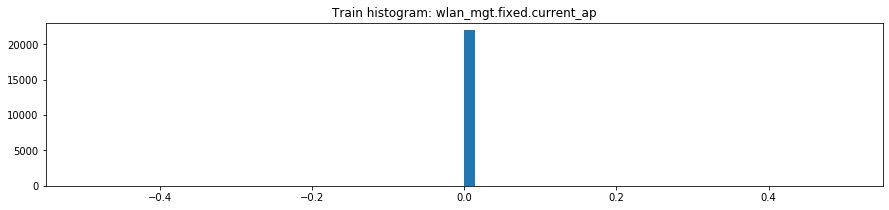

,wlan_mgt.fixed.current_ap,Train,Train normal,Train not normal
0,count,21931.0,18728.0,3203.0
1,mean,0.0,0.0,0.0
2,std,0.0,0.0,0.0
3,min,0.0,0.0,0.0
4,25%,0.0,0.0,0.0
5,50%,0.0,0.0,0.0
6,75%,0.0,0.0,0.0
7,max,0.0,0.0,0.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan_mgt.fixed.current_ap,Count in train (desc),Mean target train,Sum target train
0,0,21931,0.853951,18728


,Column,Correlation with wlan_mgt.fixed.current_ap
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,radiotap.datarate,NaN
5,wlan.fc.type_subtype,NaN


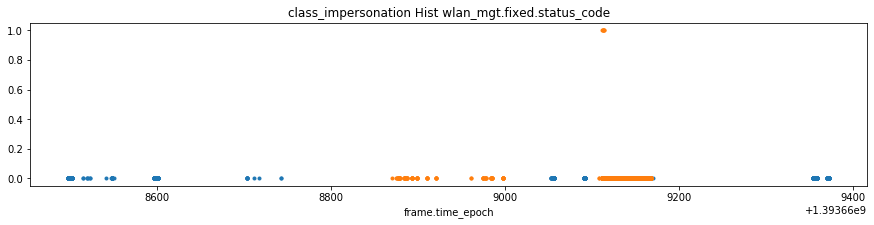

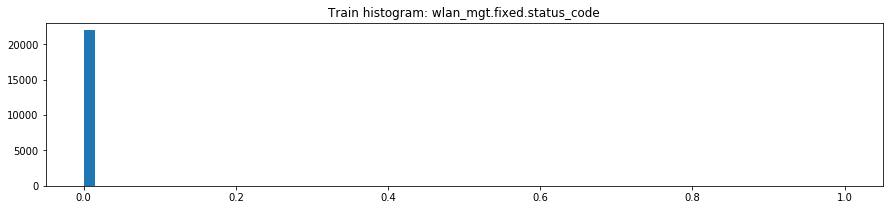

,wlan_mgt.fixed.status_code,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.0
1,mean,0.000274,0.000320,0.0
2,std,0.016539,0.017897,0.0
3,min,0.000000,0.000000,0.0
4,25%,0.000000,0.000000,0.0
5,50%,0.000000,0.000000,0.0
6,75%,0.000000,0.000000,0.0
7,max,1.000000,1.000000,0.0
8,unique values,2.000000,2.000000,1.0
9,NaNs,0.000000,0.000000,0.0


,wlan_mgt.fixed.status_code,Count in train (desc),Mean target train,Sum target train
0,0,21925,0.853911,18722
1,1,6,1.000000,6


,Column,Correlation with wlan_mgt.fixed.status_code
0,wlan_mgt.fixed.status_code,1.000000
1,wlan_mgt.fixed.auth.alg,0.912850
2,wlan_mgt.fixed.aid,0.408202
3,wlan.fc.type_subtype,0.054033
4,wlan.fc.subtype,0.038537
5,wlan.seq,0.036764
25,class_normal,-0.002755
26,class_flooding,-0.006044
27,frame.time_relative,-0.008997
28,wlan.sa,-0.013485


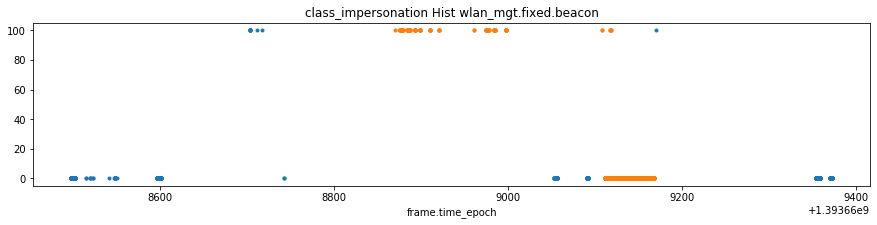

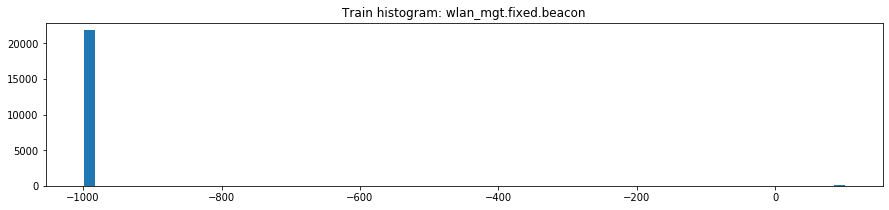

,wlan_mgt.fixed.beacon,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.000000
1,mean,-992.685924,-992.192866,-995.568842
2,std,83.063930,86.227025,61.320829
3,min,-999.000000,-999.000000,-999.000000
4,25%,-999.000000,-999.000000,-999.000000
5,50%,-999.000000,-999.000000,-999.000000
6,75%,-999.000000,-999.000000,-999.000000
7,max,100.000000,100.000000,100.000000
8,unique values,2.000000,2.000000,2.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan_mgt.fixed.beacon,Count in train (desc),Mean target train,Sum target train
0,-999.0,21805,0.853566,18612
1,100.0,126,0.920635,116


,Column,Correlation with wlan_mgt.fixed.beacon
0,wlan_mgt.fixed.beacon,1.000000
1,wlan_mgt.fixed.capabilities.ess,0.996032
2,wlan.seq,0.153614
3,frame.len,0.099283
4,wlan.fc.retry,0.088833
5,wlan.fc.subtype,0.087579
25,wlan.fc.type_subtype,-0.178689
26,wlan.wep.iv_passed1second_count,-0.206768
27,wlan.ta_passed1second_count,-0.254897
28,frame.time_relative,-0.255678


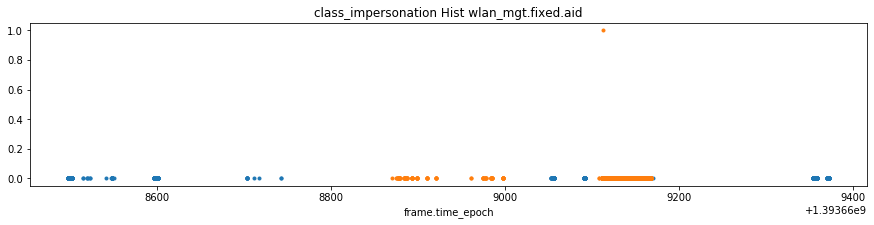

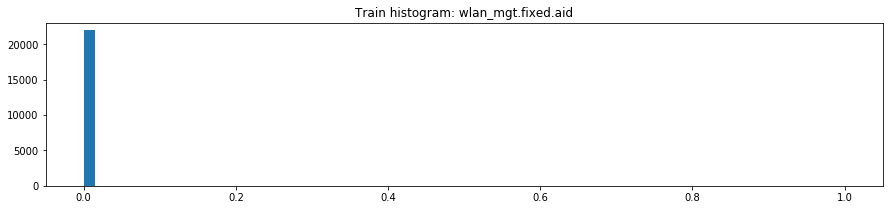

,wlan_mgt.fixed.aid,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.0
1,mean,0.000046,0.000053,0.0
2,std,0.006753,0.007307,0.0
3,min,0.000000,0.000000,0.0
4,25%,0.000000,0.000000,0.0
5,50%,0.000000,0.000000,0.0
6,75%,0.000000,0.000000,0.0
7,max,1.000000,1.000000,0.0
8,unique values,2.000000,2.000000,1.0
9,NaNs,0.000000,0.000000,0.0


,wlan_mgt.fixed.aid,Count in train (desc),Mean target train,Sum target train
0,0,21930,0.853944,18727
1,1,1,1.000000,1


,Column,Correlation with wlan_mgt.fixed.aid
0,wlan_mgt.fixed.aid,1.000000
1,wlan_mgt.fixed.status_code,0.408202
2,wlan_mgt.fixed.capabilities.ess,0.088480
3,wlan.fc.type_subtype,0.038378
4,wlan.seq,0.009198
5,wlan.ta_passed1second_count_change,0.006965
25,class_flooding,-0.002467
26,frame.time_relative,-0.003696
27,frame.time_delta,-0.003738
28,wlan.sa,-0.005504


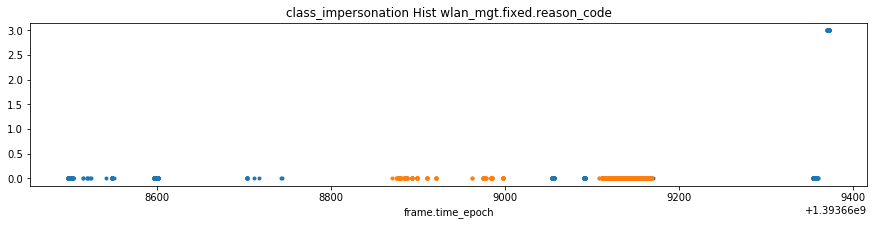

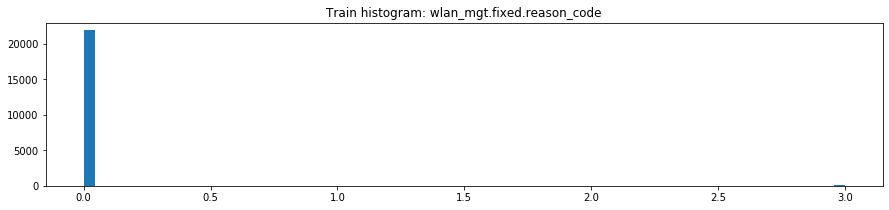

,wlan_mgt.fixed.reason_code,Train,Train normal,Train not normal
0,count,21931.000000,18728.0,3203.000000
1,mean,0.011491,0.0,0.078676
2,std,0.185314,0.0,0.479490
3,min,0.000000,0.0,0.000000
4,25%,0.000000,0.0,0.000000
5,50%,0.000000,0.0,0.000000
6,75%,0.000000,0.0,0.000000
7,max,3.000000,0.0,3.000000
8,unique values,2.000000,1.0,2.000000
9,NaNs,0.000000,0.0,0.000000


,wlan_mgt.fixed.reason_code,Count in train (desc),Mean target train,Sum target train
0,0,21847,0.857234,18728
1,3,84,0.000000,0


,Column,Correlation with wlan_mgt.fixed.reason_code
0,wlan_mgt.fixed.reason_code,1.000000
1,frame.time_relative,0.369456
2,wlan.fc.type_subtype,0.307448
3,frame.time_delta,0.171201
4,class_flooding,0.169707
5,frame.time_epoch,0.168561
25,wlan.sa,-0.050545
26,class_impersonation,-0.149938
27,wlan.wep.iv_passed1second_count,-0.156238
28,wlan.ta_passed1second_count,-0.195465


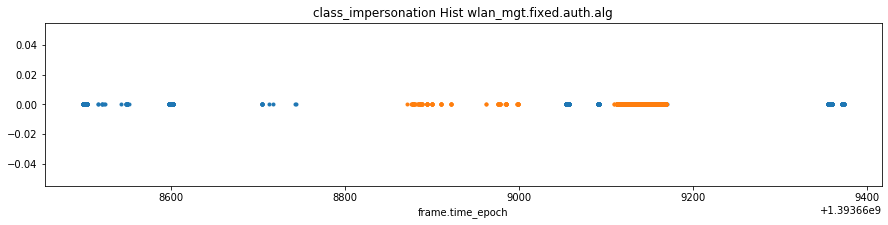

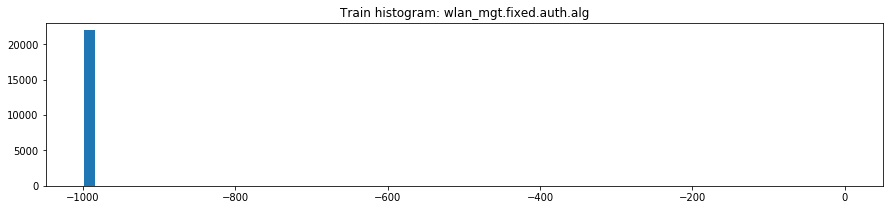

,wlan_mgt.fixed.auth.alg,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.0
1,mean,-998.772240,-998.733287,-999.0
2,std,15.082789,16.321437,0.0
3,min,-999.000000,-999.000000,-999.0
4,25%,-999.000000,-999.000000,-999.0
5,50%,-999.000000,-999.000000,-999.0
6,75%,-999.000000,-999.000000,-999.0
7,max,0.000000,0.000000,-999.0
8,unique values,2.000000,2.000000,1.0
9,NaNs,0.000000,0.000000,0.0


,wlan_mgt.fixed.auth.alg,Count in train (desc),Mean target train,Sum target train
0,-999.0,21926,0.853918,18723
1,0.0,5,1.000000,5


,Column,Correlation with wlan_mgt.fixed.auth.alg
0,wlan_mgt.fixed.auth.alg,1.000000
1,wlan_mgt.fixed.status_code,0.912850
2,wlan.fc.subtype,0.042415
3,wlan.fc.type_subtype,0.042023
4,wlan.seq,0.036158
5,frame.len,0.014400
25,wlan.wep.iv_passed1second_count_change,-0.002999
26,class_flooding,-0.005518
27,frame.time_relative,-0.008203
28,wlan.sa,-0.012309


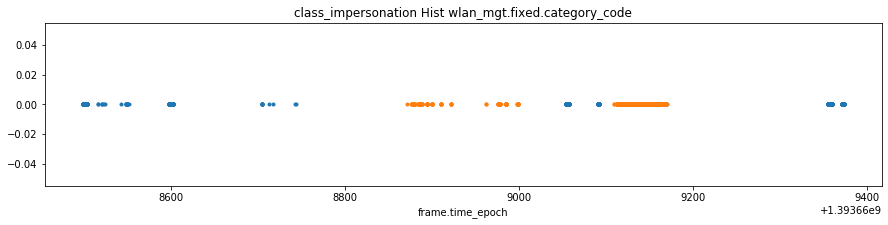

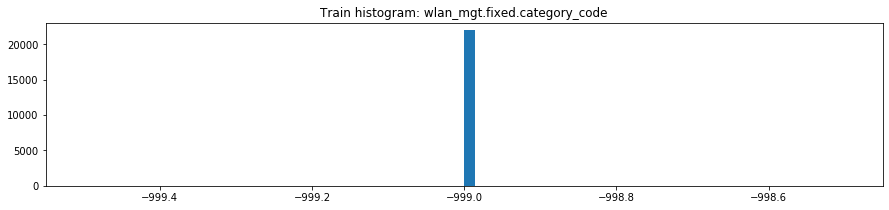

,wlan_mgt.fixed.category_code,Train,Train normal,Train not normal
0,count,21931.0,18728.0,3203.0
1,mean,-999.0,-999.0,-999.0
2,std,0.0,0.0,0.0
3,min,-999.0,-999.0,-999.0
4,25%,-999.0,-999.0,-999.0
5,50%,-999.0,-999.0,-999.0
6,75%,-999.0,-999.0,-999.0
7,max,-999.0,-999.0,-999.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan_mgt.fixed.category_code,Count in train (desc),Mean target train,Sum target train
0,-999.0,21931,0.853951,18728


,Column,Correlation with wlan_mgt.fixed.category_code
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,radiotap.datarate,NaN
5,wlan.fc.type_subtype,NaN


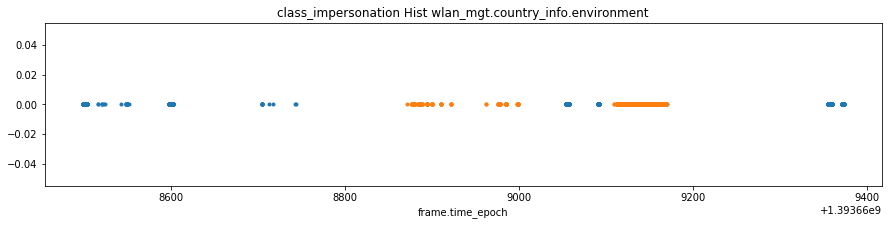

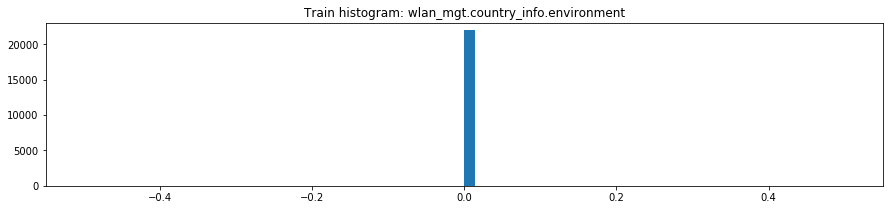

,wlan_mgt.country_info.environment,Train,Train normal,Train not normal
0,count,21931.0,18728.0,3203.0
1,mean,0.0,0.0,0.0
2,std,0.0,0.0,0.0
3,min,0.0,0.0,0.0
4,25%,0.0,0.0,0.0
5,50%,0.0,0.0,0.0
6,75%,0.0,0.0,0.0
7,max,0.0,0.0,0.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan_mgt.country_info.environment,Count in train (desc),Mean target train,Sum target train
0,0,21931,0.853951,18728


,Column,Correlation with wlan_mgt.country_info.environment
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,radiotap.datarate,NaN
5,wlan.fc.type_subtype,NaN


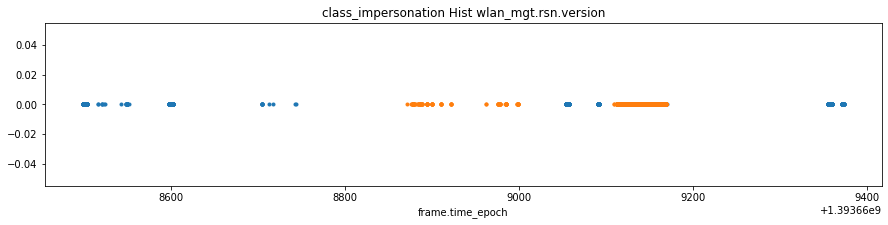

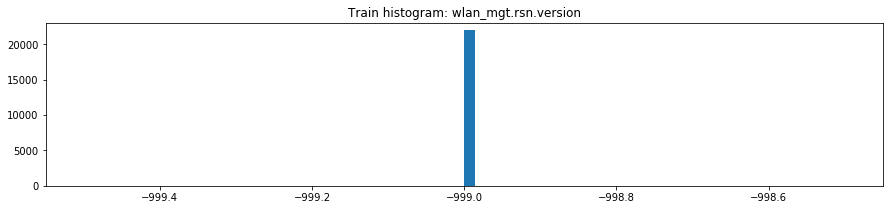

,wlan_mgt.rsn.version,Train,Train normal,Train not normal
0,count,21931.0,18728.0,3203.0
1,mean,-999.0,-999.0,-999.0
2,std,0.0,0.0,0.0
3,min,-999.0,-999.0,-999.0
4,25%,-999.0,-999.0,-999.0
5,50%,-999.0,-999.0,-999.0
6,75%,-999.0,-999.0,-999.0
7,max,-999.0,-999.0,-999.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan_mgt.rsn.version,Count in train (desc),Mean target train,Sum target train
0,-999.0,21931,0.853951,18728


,Column,Correlation with wlan_mgt.rsn.version
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,radiotap.datarate,NaN
5,wlan.fc.type_subtype,NaN


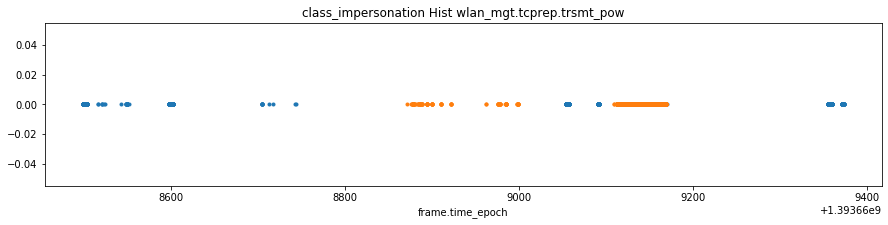

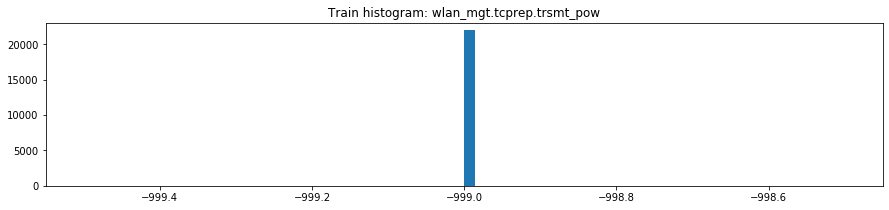

,wlan_mgt.tcprep.trsmt_pow,Train,Train normal,Train not normal
0,count,21931.0,18728.0,3203.0
1,mean,-999.0,-999.0,-999.0
2,std,0.0,0.0,0.0
3,min,-999.0,-999.0,-999.0
4,25%,-999.0,-999.0,-999.0
5,50%,-999.0,-999.0,-999.0
6,75%,-999.0,-999.0,-999.0
7,max,-999.0,-999.0,-999.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan_mgt.tcprep.trsmt_pow,Count in train (desc),Mean target train,Sum target train
0,-999.0,21931,0.853951,18728


,Column,Correlation with wlan_mgt.tcprep.trsmt_pow
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,radiotap.datarate,NaN
5,wlan.fc.type_subtype,NaN


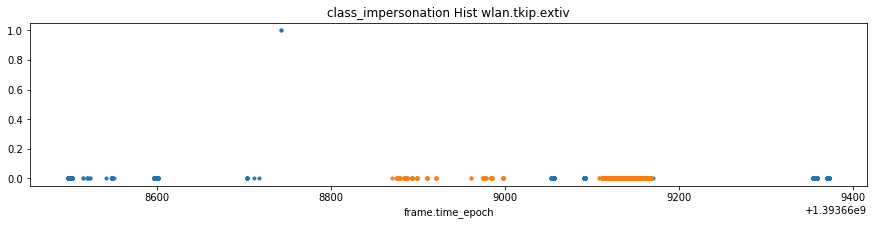

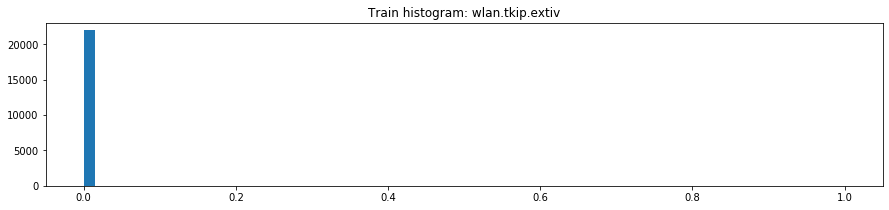

,wlan.tkip.extiv,Train,Train normal,Train not normal
0,count,21931.000000,18728.0,3203.000000
1,mean,0.000091,0.0,0.000624
2,std,0.009549,0.0,0.024984
3,min,0.000000,0.0,0.000000
4,25%,0.000000,0.0,0.000000
5,50%,0.000000,0.0,0.000000
6,75%,0.000000,0.0,0.000000
7,max,1.000000,0.0,1.000000
8,unique values,2.000000,1.0,2.000000
9,NaNs,0.000000,0.0,0.000000


,wlan.tkip.extiv,Count in train (desc),Mean target train,Sum target train
0,0,21929,0.854029,18728
1,1,2,0.000000,0


,Column,Correlation with wlan.tkip.extiv
0,wlan.tkip.extiv,1.000000
1,class_normal,0.057337
2,frame.time_delta,0.047518
3,frame.len,0.011149
4,wlan.bssid,0.008544
5,wlan.duration,0.003299
25,class_impersonation,-0.023093
26,wlan.wep.iv_passed1second_count,-0.027280
27,wlan.ta_passed1second_count,-0.033199
28,frame.time_relative,-0.034521


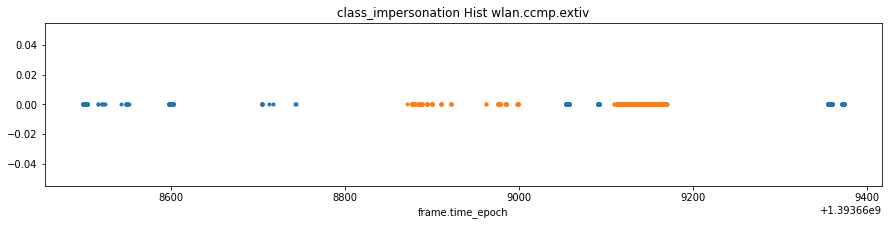

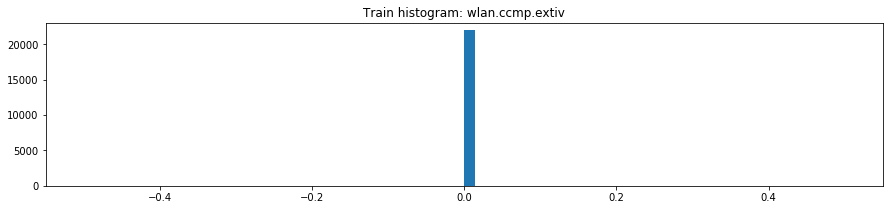

,wlan.ccmp.extiv,Train,Train normal,Train not normal
0,count,21931.0,18728.0,3203.0
1,mean,0.0,0.0,0.0
2,std,0.0,0.0,0.0
3,min,0.0,0.0,0.0
4,25%,0.0,0.0,0.0
5,50%,0.0,0.0,0.0
6,75%,0.0,0.0,0.0
7,max,0.0,0.0,0.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan.ccmp.extiv,Count in train (desc),Mean target train,Sum target train
0,0,21931,0.853951,18728


,Column,Correlation with wlan.ccmp.extiv
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,radiotap.datarate,NaN
5,wlan.fc.type_subtype,NaN


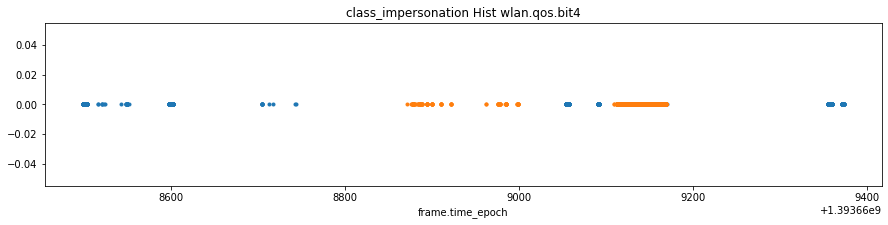

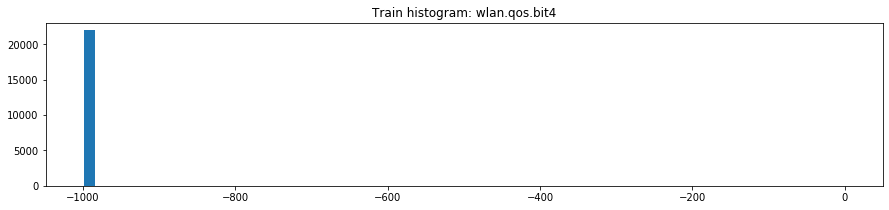

,wlan.qos.bit4,Train,Train normal,Train not normal
0,count,21931.000000,18728.0,3203.000000
1,mean,-998.954448,-999.0,-998.688105
2,std,6.745844,0.0,17.651720
3,min,-999.000000,-999.0,-999.000000
4,25%,-999.000000,-999.0,-999.000000
5,50%,-999.000000,-999.0,-999.000000
6,75%,-999.000000,-999.0,-999.000000
7,max,0.000000,-999.0,0.000000
8,unique values,2.000000,1.0,2.000000
9,NaNs,0.000000,0.0,0.000000


,wlan.qos.bit4,Count in train (desc),Mean target train,Sum target train
0,-999.0,21930,0.85399,18728
1,0.0,1,0.00000,0


,Column,Correlation with wlan.qos.bit4
0,wlan.qos.bit4,1.000000
1,radiotap.datarate,0.995579
2,class_injection,0.188866
3,wlan.seq,0.026122
4,wlan.fc.subtype,0.013142
5,frame.len,0.008172
25,wlan.duration,-0.016483
26,wlan.wep.iv_passed1second_count,-0.019223
27,wlan.ta_passed1second_count,-0.023475
28,frame.time_relative,-0.024410


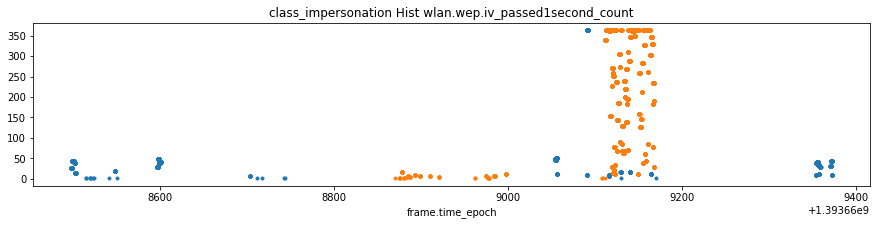

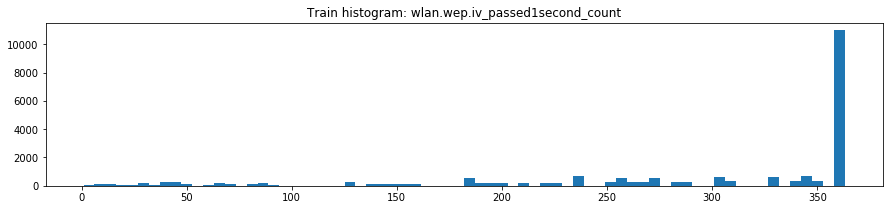

,wlan.wep.iv_passed1second_count,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.000000
1,mean,290.753317,296.417877,257.632532
2,std,101.438954,90.009909,147.665551
3,min,1.000000,1.000000,1.000000
4,25%,238.000000,251.000000,48.000000
5,50%,361.000000,346.000000,363.000000
6,75%,363.000000,363.000000,363.000000
7,max,363.000000,363.000000,363.000000
8,unique values,83.000000,65.000000,76.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.wep.iv_passed1second_count,Count in train (desc),Mean target train,Sum target train
0,363.0,9888,0.799454,7905
1,362.0,724,0.975138,706
2,346.0,692,0.976879,676
3,361.0,361,0.983380,355
4,349.0,349,0.979943,342
5,340.0,340,0.988235,336
6,330.0,330,0.978788,323
7,327.0,327,0.975535,319
8,310.0,310,0.980645,304
9,304.0,304,0.976974,297


,Column,Correlation with wlan.wep.iv_passed1second_count
0,wlan.wep.iv_passed1second_count,1.000000
1,wlan.ta_passed1second_count,0.727209
2,frame.time_epoch,0.282846
3,wlan.fc.type,0.238291
4,wlan.wep.iv_passed1second_count_change,0.150064
5,class_impersonation,0.135033
25,wlan_mgt.fixed.reason_code,-0.156238
26,wlan_mgt.fixed.capabilities.ess,-0.205529
27,wlan_mgt.fixed.beacon,-0.206768
28,wlan.fc.pwrmgt,-0.220875


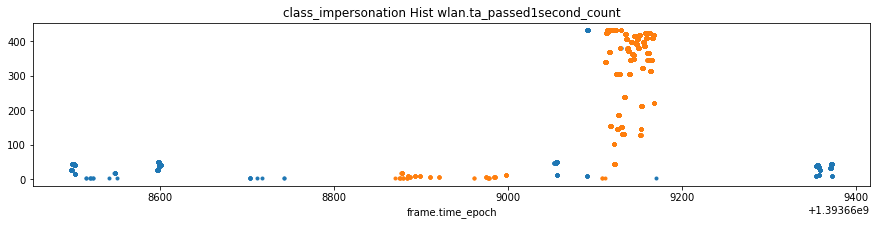

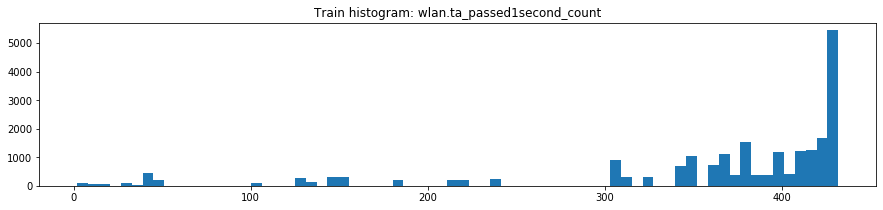

,wlan.ta_passed1second_count,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.000000
1,mean,357.827231,365.587516,312.452701
2,std,102.360020,82.073330,173.065468
3,min,2.000000,2.000000,2.000000
4,25%,346.000000,346.000000,49.000000
5,50%,396.000000,391.000000,432.000000
6,75%,423.000000,423.000000,432.000000
7,max,432.000000,432.000000,432.000000
8,unique values,71.000000,54.000000,66.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.ta_passed1second_count,Count in train (desc),Mean target train,Sum target train
0,432.0,4583,0.600262,2751
1,423.0,1269,0.978723,1242
2,397.0,794,0.977330,776
3,381.0,762,0.947507,722
4,365.0,730,0.969863,708
5,346.0,692,0.976879,676
6,304.0,608,0.947368,576
7,429.0,429,0.937063,402
8,426.0,426,0.978873,417
9,421.0,421,0.973872,410


,Column,Correlation with wlan.ta_passed1second_count
0,wlan.ta_passed1second_count,1.000000
1,wlan.wep.iv_passed1second_count,0.727209
2,frame.time_epoch,0.352872
3,wlan.fc.type,0.330222
4,wlan.ta_passed1second_count_change,0.219251
5,class_impersonation,0.183326
25,wlan_mgt.fixed.reason_code,-0.195465
26,wlan_mgt.fixed.capabilities.ess,-0.253515
27,wlan_mgt.fixed.beacon,-0.254897
28,wlan.fc.pwrmgt,-0.275942


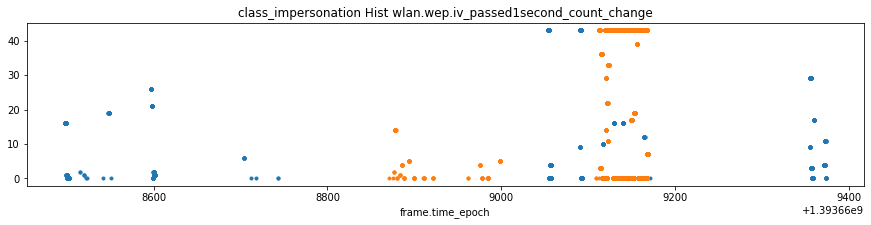

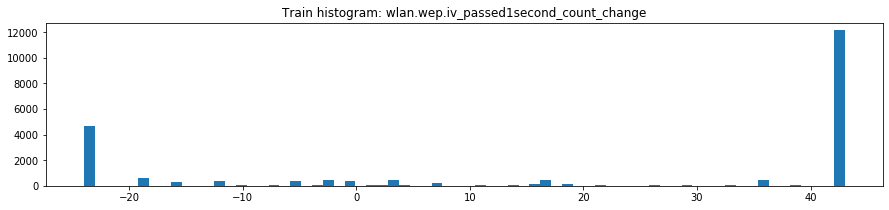

,wlan.wep.iv_passed1second_count_change,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.000000
1,mean,19.340887,19.722501,17.109585
2,std,28.905710,29.064774,27.857486
3,min,-24.000000,-24.000000,-24.000000
4,25%,-16.000000,-16.000000,-7.000000
5,50%,43.000000,43.000000,26.000000
6,75%,43.000000,43.000000,43.000000
7,max,43.000000,43.000000,43.000000
8,unique values,40.000000,27.000000,36.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.wep.iv_passed1second_count_change,Count in train (desc),Mean target train,Sum target train
0,43.0,12121,0.873525,10588
1,-24.0,4654,0.843575,3926
2,-19.0,647,0.975270,631
3,3.0,468,0.891026,417
4,36.0,462,0.971861,449
5,17.0,436,0.908257,396
6,-2.0,425,0.870588,370
7,-1.0,412,0.873786,360
8,-5.0,391,0.961637,376
9,-12.0,349,0.979943,342


,Column,Correlation with wlan.wep.iv_passed1second_count_change
0,wlan.wep.iv_passed1second_count_change,1.000000
1,wlan.ta_passed1second_count_change,0.521572
2,wlan.wep.iv_passed1second_count,0.150064
3,wlan.ta_passed1second_count,0.087727
4,wlan.fc.type,0.056929
5,frame.time_epoch,0.050893
25,wlan_mgt.fixed.reason_code,-0.031658
26,wlan.fc.pwrmgt,-0.034270
27,frame.time_delta,-0.037540
28,wlan_mgt.fixed.capabilities.ess,-0.050755


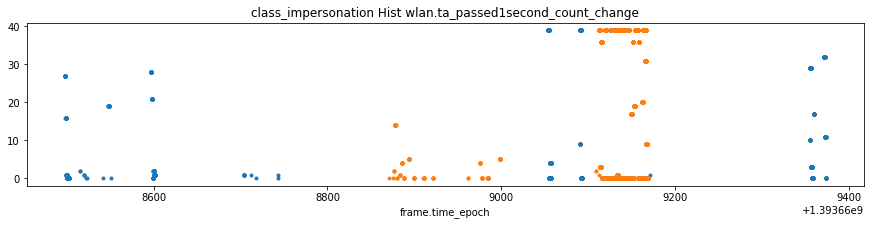

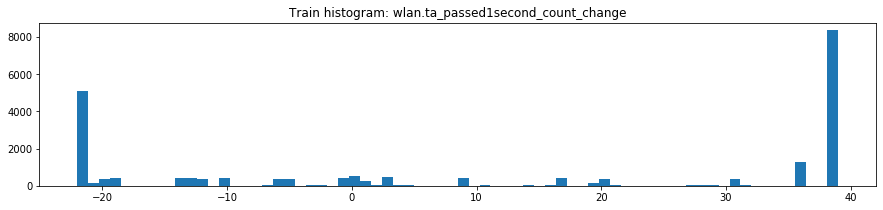

,wlan.ta_passed1second_count_change,Train,Train normal,Train not normal
0,count,21931.000000,18728.000000,3203.000000
1,mean,11.788655,11.351399,14.345301
2,std,26.381810,26.439654,25.897700
3,min,-22.000000,-22.000000,-22.000000
4,25%,-20.000000,-20.000000,-20.000000
5,50%,17.000000,17.000000,21.000000
6,75%,39.000000,39.000000,39.000000
7,max,39.000000,39.000000,39.000000
8,unique values,38.000000,28.000000,35.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.ta_passed1second_count_change,Count in train (desc),Mean target train,Sum target train
0,39.0,8341,0.828917,6914
1,-22.0,5115,0.845552,4325
2,36.0,1302,0.971582,1265
3,0.0,522,0.967433,505
4,3.0,468,0.891026,417
5,17.0,436,0.908257,396
6,9.0,427,0.943794,403
7,-10.0,426,0.884977,377
8,-1.0,412,0.873786,360
9,-14.0,410,0.975610,400


,Column,Correlation with wlan.ta_passed1second_count_change
0,wlan.ta_passed1second_count_change,1.000000
1,wlan.wep.iv_passed1second_count_change,0.521572
2,wlan.ta_passed1second_count,0.219251
3,wlan.wep.iv_passed1second_count,0.119930
4,wlan.fc.subtype,0.069840
5,class_flooding,0.057394
25,class_impersonation,-0.040078
26,wlan.duration,-0.061478
27,wlan.bssid,-0.064969
28,wlan.seq,-0.072205


In [27]:
for col in columns:
    proc(df=X_test_bad, tcol='frame.time_epoch', target='class_impersonation', col=col, target_first=False, df_test=None, include_test=False)

In [28]:
len(columns)

36

In [29]:
X_test_bad['wlan.wep.iv_passed1second_count']

265709    27.0
265718    27.0
265732    27.0
265740    27.0
265760    27.0
          ... 
568211     9.0
568214     9.0
568217     9.0
568221     9.0
568226     9.0
Name: wlan.wep.iv_passed1second_count, Length: 21931, dtype: float64